In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import warnings

In [2]:
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv("C:/a space/S8/Reto/iar_Reservaciones.csv")

In [4]:
df.drop(['h_correo_e', 'h_nom'], axis='columns', inplace=True)

In [5]:
df.shape

(203002, 47)

#### Reemplazamos los campos vacíos (con solo espacios) por valores nulos para mayor control

In [6]:
df = df.replace(r'^\s*$', np.nan, regex=True)

#### Contamos no nulos después de la corrección

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203002 entries, 0 to 203001
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID_Reserva                203002 non-null  int64  
 1   Fecha_hoy                 203002 non-null  object 
 2   h_res_fec                 203002 non-null  int64  
 3   h_res_fec_ok              203002 non-null  object 
 4   h_res_fec_okt             203002 non-null  object 
 5   h_num_per                 203002 non-null  int64  
 6   aa_h_num_per              203002 non-null  int64  
 7   h_num_adu                 203002 non-null  int64  
 8   aa_h_num_adu              203002 non-null  int64  
 9   h_num_men                 203002 non-null  int64  
 10  aa_h_num_men              203002 non-null  int64  
 11  h_num_noc                 203002 non-null  int64  
 12  aa_h_num_noc              203002 non-null  int64  
 13  h_tot_hab                 203002 non-null  i

#### Convertimos a tipo de dato fecha todas las columnas en las que corresponda, haciendo distinción dependiendo de su formato

In [8]:
columnas_fechas = ['Fecha_hoy', 'h_fec_reg_ok', 'h_fec_reg_okt', 'h_res_fec_ok', 'h_res_fec_okt', 'h_fec_lld_ok', 'h_fec_lld_okt', 'h_ult_cam_fec_ok', 'h_ult_cam_fec_okt', 'h_fec_sda_ok', 'h_fec_sda_okt']
columnas_fechas_sin_guion = ['h_fec_reg', 'h_fec_lld', 'h_res_fec','h_ult_cam_fec', 'h_fec_sda', ]

for fecha in columnas_fechas:
    df[fecha] = pd.to_datetime(df[fecha], errors='coerce')

for fecha in columnas_fechas_sin_guion:
    df[fecha] = pd.to_datetime(df[fecha], format='%Y%m%d', errors='coerce')


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203002 entries, 0 to 203001
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ID_Reserva                203002 non-null  int64         
 1   Fecha_hoy                 203002 non-null  datetime64[ns]
 2   h_res_fec                 203002 non-null  datetime64[ns]
 3   h_res_fec_ok              203002 non-null  datetime64[ns]
 4   h_res_fec_okt             203002 non-null  datetime64[ns]
 5   h_num_per                 203002 non-null  int64         
 6   aa_h_num_per              203002 non-null  int64         
 7   h_num_adu                 203002 non-null  int64         
 8   aa_h_num_adu              203002 non-null  int64         
 9   h_num_men                 203002 non-null  int64         
 10  aa_h_num_men              203002 non-null  int64         
 11  h_num_noc                 203002 non-null  int64         
 12  aa

### Revisamos cantidad y porcentajes de valores nulos

In [10]:
df.isnull().sum().sort_values(ascending=False)

h_cod_reserva               128142
h_codigop                    57324
h_fec_reg                     1550
h_ult_cam_fec                  533
h_can_res                      492
h_fec_sda                       34
h_fec_lld                        2
h_edo                            2
Cliente_Disp                     0
h_fec_reg_ok                     0
h_fec_reg_okt                    0
h_fec_sda_ok                     0
h_fec_sda_okt                    0
ID_Pais_Origen                   0
ID_Reserva                       0
aa_Cliente_Disp                  0
Reservacion                      0
h_fec_lld_okt                    0
ID_estatus_reservaciones         0
h_tfa_total                      0
aa_h_tfa_total                   0
moneda_cve                       0
h_ult_cam_fec_ok                 0
aa_Reservacion                   0
h_fec_lld_ok                     0
Fecha_hoy                        0
ID_canal                         0
h_res_fec                        0
h_res_fec_ok        

In [11]:
(df.isnull().mean() * 100).sort_values(ascending=False)

h_cod_reserva               63.123516
h_codigop                   28.238145
h_fec_reg                    0.763539
h_ult_cam_fec                0.262559
h_can_res                    0.242362
h_fec_sda                    0.016749
h_fec_lld                    0.000985
h_edo                        0.000985
Cliente_Disp                 0.000000
h_fec_reg_ok                 0.000000
h_fec_reg_okt                0.000000
h_fec_sda_ok                 0.000000
h_fec_sda_okt                0.000000
ID_Pais_Origen               0.000000
ID_Reserva                   0.000000
aa_Cliente_Disp              0.000000
Reservacion                  0.000000
h_fec_lld_okt                0.000000
ID_estatus_reservaciones     0.000000
h_tfa_total                  0.000000
aa_h_tfa_total               0.000000
moneda_cve                   0.000000
h_ult_cam_fec_ok             0.000000
aa_Reservacion               0.000000
h_fec_lld_ok                 0.000000
Fecha_hoy                    0.000000
ID_canal    

#### Eliminamos columnas con mayores cantidades de valores nulos

In [12]:
df = df.drop(columns=['h_cod_reserva', 'h_codigop'])

#### Eliminamos filas que contengan todavía algún valor nulo

In [13]:
df = df.dropna()

In [14]:
df.shape

(201412, 45)

In [15]:
df.head()

,ID_Reserva,Fecha_hoy,h_res_fec,h_res_fec_ok,h_res_fec_okt,h_num_per,aa_h_num_per,h_num_adu,aa_h_num_adu,h_num_men,...,aa_Reservacion,ID_estatus_reservaciones,h_can_res,h_edo,h_tfa_total,aa_h_tfa_total,moneda_cve,h_ult_cam_fec,h_ult_cam_fec_ok,h_ult_cam_fec_okt
0,0,2019-08-16,2019-08-16,2019-08-16,2019-08-16,2,0,2,0,0,...,0,9,09,EMX,2659.98,0.0,1,2019-11-10,2019-11-10,2019-11-10
1,1,2019-10-22,2019-10-22,2019-10-22,2019-10-22,4,0,4,0,0,...,0,9,09,EGT,1764.00,0.0,1,2019-12-05,2019-12-05,2019-12-05
2,2,2019-10-28,2019-10-28,2019-10-28,2019-10-28,2,0,2,0,0,...,0,9,09,EMC,2660.04,0.0,1,2019-12-05,2019-12-05,2019-12-05
3,3,2019-10-28,2019-10-28,2019-10-28,2019-10-28,4,0,3,0,0,...,0,9,09,EGT,1995.03,0.0,1,2019-12-11,2019-12-11,2019-12-11
4,4,2019-10-28,2019-10-28,2019-10-28,2019-10-28,2,0,2,0,0,...,0,9,12,EMX,13369.92,0.0,1,2019-12-12,2019-12-12,2019-12-12


#### Observamos pares de columnas ordenadas por cantidad de datos iguales

In [16]:
def comparar_columnas(df):
    resultados = []
    for col1, col2 in combinations(df.columns, 2):
        iguales = (df[col1] == df[col2]) & ~(df[col1].isna() | df[col2].isna())
        conteo = iguales.sum()
        resultados.append({
            'columna_1': col1,
            'columna_2': col2,
            'valores_iguales': conteo
        })

    return pd.DataFrame(resultados)

In [17]:
resutados = comparar_columnas(df)

In [18]:
resutados.sort_values(by='valores_iguales', ascending=False).head()

,columna_1,columna_2,valores_iguales
989,h_ult_cam_fec_ok,h_ult_cam_fec_okt,201412
311,h_num_adu,Cliente_Disp,201412
686,ID_empresa,moneda_cve,201412
737,h_fec_lld,h_fec_lld_ok,201412
738,h_fec_lld,h_fec_lld_okt,201412


#### Eliminamos columnas duplicadas

In [19]:
# Función para generar una lista basándose en la cantidad de valores iguales a otra
def filtrar_valores(df, columna_evaluar, umbral, columna_extraer):
    array = []
    for index, row in df.iterrows():
        if row[columna_evaluar] >= umbral:
            array.append(row[columna_extraer])
    return array

In [20]:
# Tomamos el umbral para filtrar como el total de filas, es decir, que las columnas sean 100% idénticas
umbral = df.shape[0]
array_repetidas = filtrar_valores(resutados, 'valores_iguales', umbral, 'columna_2')

In [21]:
df.drop(array_repetidas, axis='columns', inplace=True)

In [22]:
df.shape

(201412, 31)

##### *Falta revisar las columnas que sólo tienen uno o dos valores diferentes entre sí

### Aseguraremos la coherencia de los datos

In [23]:
df.columns

Index(['ID_Reserva', 'Fecha_hoy', 'h_res_fec', 'h_num_per', 'aa_h_num_per',
       'h_num_adu', 'aa_h_num_adu', 'h_num_men', 'aa_h_num_men', 'h_num_noc',
       'aa_h_num_noc', 'h_tot_hab', 'aa_h_tot_hab', 'ID_Programa',
       'ID_Paquete', 'ID_Segmento_Comp', 'ID_Agencia', 'ID_Tipo_Habitacion',
       'ID_canal', 'h_fec_lld', 'h_fec_reg', 'h_fec_sda', 'ID_Pais_Origen',
       'Reservacion', 'aa_Reservacion', 'ID_estatus_reservaciones',
       'h_can_res', 'h_edo', 'h_tfa_total', 'aa_h_tfa_total', 'h_ult_cam_fec'],
      dtype='object')

In [24]:
# Observamos que hay más de 100,000 registros con número de personas = 0, lo cual es incoherente
df['h_num_per'].value_counts()

h_num_per
0     100019
2      71325
3      14922
4       7710
1       4900
5       1280
6        781
8        228
7         96
12        40
10        21
11        18
9         17
17        13
32        10
16         8
18         6
14         6
19         5
13         3
20         2
15         2
Name: count, dtype: int64

In [25]:
df['aa_h_num_per'].value_counts()

aa_h_num_per
0     101393
2      70108
3      14861
4       7654
1       4887
5       1276
6        775
8        215
7         96
12        38
10        20
11        18
9         17
17        13
32        10
16         8
18         6
14         6
19         5
13         3
20         2
15         1
Name: count, dtype: int64

In [26]:
df['h_num_per'].value_counts()

h_num_per
0     100019
2      71325
3      14922
4       7710
1       4900
5       1280
6        781
8        228
7         96
12        40
10        21
11        18
9         17
17        13
32        10
16         8
18         6
14         6
19         5
13         3
20         2
15         2
Name: count, dtype: int64

#### Reemplazaremos todos los valores de "número de personas" por el resultado de la suma de número de adultos + número de menores

In [27]:
df.loc[df['h_num_per'], 'h_num_per'] = df['h_num_men'] + df['h_num_adu']
df.loc[df['aa_h_num_per'], 'aa_h_num_per'] = df['aa_h_num_men'] + df['aa_h_num_adu']


In [28]:
# *Chale, pues no redujimos los ceros, revisamos si en efecto tiene lógica
df[df['h_num_per'] == 0].head()

,ID_Reserva,Fecha_hoy,h_res_fec,h_num_per,aa_h_num_per,h_num_adu,aa_h_num_adu,h_num_men,aa_h_num_men,h_num_noc,...,h_fec_sda,ID_Pais_Origen,Reservacion,aa_Reservacion,ID_estatus_reservaciones,h_can_res,h_edo,h_tfa_total,aa_h_tfa_total,h_ult_cam_fec
102199,102199,2020-08-16,2019-08-16,0,2,0,2,0,0,0,...,2019-11-10,157,0,1,9,09,EMX,0.0,2659.98,2019-11-10
102200,102200,2020-10-22,2019-10-22,0,4,0,4,0,0,0,...,2019-12-05,157,0,1,9,09,EGT,0.0,1764.00,2019-12-05
102201,102201,2020-10-28,2019-10-28,0,2,0,2,0,0,0,...,2019-12-05,157,0,1,9,09,EMC,0.0,2660.04,2019-12-05
102202,102202,2020-10-28,2019-10-28,0,4,0,3,0,0,0,...,2019-12-11,157,0,1,9,09,EGT,0.0,1995.03,2019-12-11
102203,102203,2020-10-28,2019-10-28,0,2,0,2,0,0,0,...,2019-12-12,157,0,1,9,12,EMX,0.0,13369.92,2019-12-12


In [29]:
df.loc[df['h_num_per'], 'h_num_per'] = df['h_num_men'] + df['h_num_adu']

#### Contaremos las columnas en las que fecha de llegada es posterior a la fecha de salida

In [30]:
conteo = (df['h_fec_lld'] > df['h_fec_sda']).sum()
print(conteo)

0


#### Reemplazaremos los registros de cantidad de noches por la diferencia entre fecha de salida y fecha de entrada

In [31]:
# Nótese que no tenemos columna de año anterior para fecha de llegada y de salida, fueron eliminadas en proceso de colunas repetidas
df.loc[df['h_num_noc'], 'h_num_noc'] = df['h_fec_sda'] - df['h_fec_lld']

### Línea de código para extraer el día de la semana de cualquier fecha

In [32]:
# Ejemplo
fecha_por_extraer = 'reservacion'
columna = 'h_res_fec'

#Agrega una nueva columna
df[f'dia_{fecha_por_extraer}'] = df[columna].dt.day_name()

In [ ]:
# Ejemplo
fecha_por_extraer = 'reservacion'
columna = 'h_res_fec'

# Crear nueva columna indicando si es fin de semana o entre semana (se puede aplicar sin tener una columna que indique día de la semana)
df[f'entre/fin_{fecha_por_extraer}'] = df[columna].dt.weekday.apply(lambda x: 'Fin de semana' if x >= 5 else 'Entre semana')


#### Vamos a generar un dataframe que tenga la ocupación y cantidad de reservaciones por fecha

In [34]:
# Generamos todas las fechas posibles entre los datos del dataframe y obtenemos el total de personas hospedadas

rows = []
for _, row in df.iterrows():
    rango_fechas = pd.date_range(start=row['h_fec_lld'], end=row['h_fec_sda'] - pd.Timedelta(days=1))
    for Fecha in rango_fechas:
        rows.append({'Fecha': Fecha, 'Personas': row['h_num_per']})

df_estancia = pd.DataFrame(rows)

personas_por_fecha = df_estancia.groupby('Fecha').sum().reset_index()


In [35]:
# Obtenemos la cantidad de reservaciones por fecha 
reservaciones_por_fecha = (
    df.groupby('h_res_fec')
    .size()
    .reset_index(name='Reservaciones')
    .rename(columns={'h_res_fec': 'Fecha'})
)

In [36]:
# Unimos ambos resultados en un solo dataframe

ValoresxFecha = pd.merge(personas_por_fecha, reservaciones_por_fecha, on='Fecha', how='outer').fillna(0)

ValoresxFecha['Personas'] = ValoresxFecha['Personas'].astype(int)
ValoresxFecha['Reservaciones'] = ValoresxFecha['Reservaciones'].astype(int)

ValoresxFecha = ValoresxFecha.sort_values('Fecha')


In [37]:
ValoresxFecha.head()

,Fecha,Personas,Reservaciones
0,2019-01-02,0,46
1,2019-01-03,0,94
2,2019-01-04,0,142
3,2019-01-05,0,56
4,2019-01-06,0,12


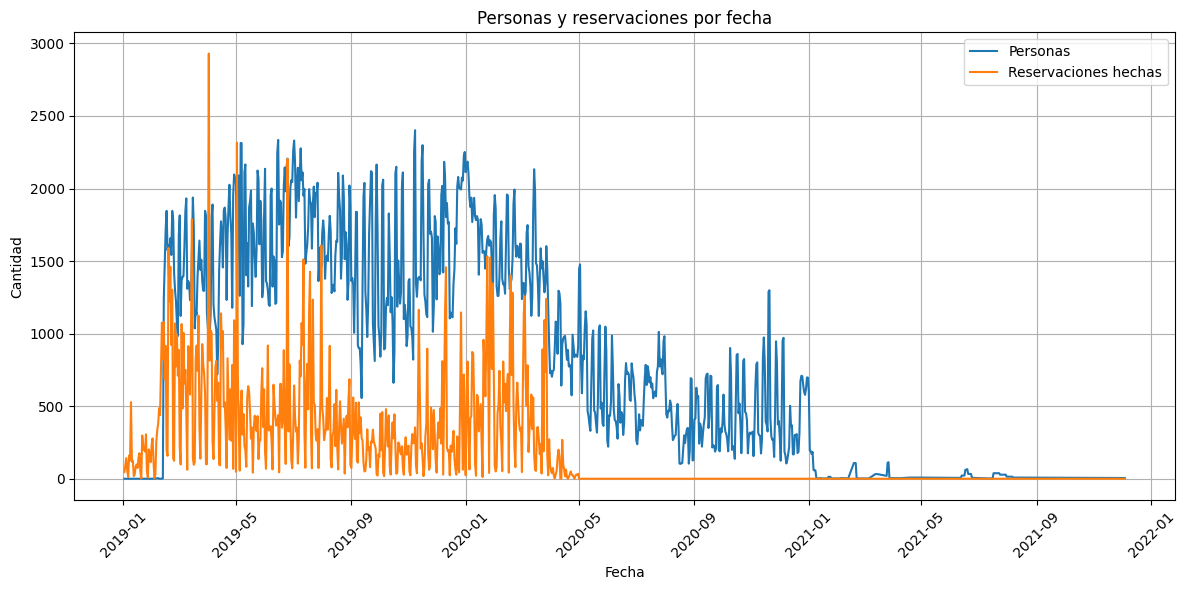

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(ValoresxFecha['Fecha'], ValoresxFecha['Personas'], label='Personas')
plt.plot(ValoresxFecha['Fecha'], ValoresxFecha['Reservaciones'], label='Reservaciones hechas')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.title('Personas y reservaciones por fecha')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
df['h_num_per'].value_counts()

h_num_per
0     100019
2      71326
3      14922
4       7709
1       4900
5       1280
6        781
8        228
7         96
12        40
10        21
11        18
9         17
17        13
32        10
16         8
18         6
14         6
19         5
13         3
20         2
15         2
Name: count, dtype: int64

#### Contamos cuantos casos hay donde la cantidad de personas es 0

In [40]:
df[df['h_num_per'] == 0].shape

(100019, 32)

#### Vamos a revisar si todos los casos en los que el número de personas es 0, también la tarifa total y las noches lo son (sospechando que son casos de "no-show")

In [41]:
# Todos los que tienen no. de personas = 0, también tienen no. de noches y tarifa total iguales a 0
cond_1 = (df['h_num_per'] == 0) & (df['h_num_noc'] == 0) & (df['h_tfa_total'] == 0)
df[cond_1].shape

(100019, 32)

In [ ]:
# Hay 203 registros que tienen no. de noches igual a 0, pero no. de personas y tarifa diferentes de 0 
cond_2 = (df['h_num_noc'] == 0) & (df['h_num_per'] != 0)
df[cond_2].shape

(203, 32)

In [45]:
df[cond_2].head()

,ID_Reserva,Fecha_hoy,h_res_fec,h_num_per,aa_h_num_per,h_num_adu,aa_h_num_adu,h_num_men,aa_h_num_men,h_num_noc,...,ID_Pais_Origen,Reservacion,aa_Reservacion,ID_estatus_reservaciones,h_can_res,h_edo,h_tfa_total,aa_h_tfa_total,h_ult_cam_fec,dia_reservacion
545,545,2019-11-28,2019-11-28,2,0,2,0,0,0,0,...,157,1,0,9,00,EMC,3000.0,0.0,2019-12-20,Thursday
969,969,2019-12-08,2019-12-08,4,0,4,0,0,0,0,...,157,1,0,9,00,EGT,637.0,0.0,2019-12-08,Sunday
972,972,2019-12-08,2019-12-08,4,0,4,0,0,0,0,...,157,1,0,9,00,EGT,637.0,0.0,2019-12-08,Sunday
1419,1419,2019-02-02,2019-02-02,2,0,2,0,0,0,0,...,157,1,0,2,DI,EQR,0.0,0.0,2019-02-28,Saturday
2447,2447,2019-12-17,2019-12-17,3,0,3,0,0,0,0,...,157,1,0,9,00,EGR,1.0,0.0,2019-12-17,Tuesday


In [43]:
# Hay más de 5 mil registros que tienen tarifa total 0, pero numero de noches y personas diferente de 0 
cond_3 = (df['h_tfa_total'] == 0) & (df['h_num_noc'] != 0) & (df['h_num_per'] != 0)
df[cond_3].shape

(5272, 32)

#### Análisis de Cardinalidad y agrupación de valores

In [ ]:
# Porcentaje acumulado que deseamos conservar. Es decir, la nueva categoría "Otro" contendrá como máximo el 10% de los valores 
umbral = 0.90

# Seleccionar columnas
cols = ['ID_Agencia']

# En caso de querer aplicar a todas las columnas categóticas
# cols = df.select_dtypes(include='object').columns

# Crear y conservar solo las versiones reducidas
for col in cols:
    freqs = df[col].value_counts(normalize=True)
    top_cats = freqs.cumsum()[freqs.cumsum() <= umbral].index
    df[col + '_reducida'] = df[col].where(df[col].isin(top_cats), other='Otro')

df.drop(columns=cols, inplace=True)
df.columns = [col.replace('_reducida', '') for col in df.columns]


In [ ]:
# También se puede realizar basándonos en un umbral de frecuencias absolutas en lugar de porcentajes
# En el caso de País de Origen, por ejemplo, podría ser útil, ya que con porcentajes se terminan sustituyendo todos los valores por "Otro"

'''umbral = 50

for col in cols:
    frecuentes = df[col].value_counts()[lambda x: x >= umbral].index
    df[col + '_reducida'] = df[col].where(df[col].isin(frecuentes), other='Otro')
    
df.drop(columns=cols, inplace=True)
df.columns = [col.replace('_reducida', '') for col in df.columns]'''

#### Regresamos al análisis de la columna estado

In [44]:
print(df['h_edo'].unique())

['EMX   ' 'EGT   ' 'EMC   ' 'EGR   ' 'EAZ   ' 'ESL   ' 'ENL   ' 'EMR   '
 'EDF   ' 'EQR   ' 'EHG   ' 'EQE   ' 'EON   ' 'EMB   ' 'ECA   ' 'EAB   '
 'EBC   ' 'EJA   ' 'ESO   ' 'ECH   ' 'EZA   ' 'EOR   ' 'ETX   ' 'EIL   '
 'EME   ' 'EMO   ' 'ENV   ' 'ESZI  ' 'EWA   ' 'ENC   ' 'ESED  ' 'EAL   '
 'EPB   ' 'EAGU  ' 'EVE   ' 'EPA   ' 'EDE   ' 'ENM   ' 'EIN   ' 'EMI   '
 'ENY   ' 'ECOL  ' 'ELA   ' 'EAS   ' 'ECU   ' 'EHI   ' 'EAAB  ' 'EDC   '
 'EID   ' 'EBCN  ' 'ECL   ' 'EGU   ' 'ESI   ' 'ENT   ' 'EAR   ' 'EGA   '
 'ECO   ' 'EESP  ' 'EFL   ' 'EUYU  ' 'ETM   ' 'EWI   ' 'EDG   ' 'ENA   '
 'ETB   ' 'ESK   ' 'EMN   ' 'EOA   ' 'EPRI  ' 'EMT   ' 'EMA   ' 'EQC   '
 'EGTE  ' 'EJPA  ' 'ECHS  ' 'EWY   ' 'EAK   ' 'EVA   ' 'EKRO  ' 'EMS   '
 'ENB   ' 'EVI   ' 'ETL   ' 'EDEG  ' 'EGBU  ' 'EALB  ' 'ECRI  ' 'EIA   '
 'EYU   ' 'ECS   ' 'EPE   ' 'EYT   ' 'EITA  ' 'EGDR  ' 'EOH   ' 'ENJ   '
 'EECU  ' 'ENE   ' 'EKEN  ' 'EGAB  ' 'EKS   ' 'ECM   ' 'EAUS  ' 'EAEU  '
 'EUMO  ' 'EMH   ' 'EVT   ' 'EFRA  ' 'ECLE  ' 'ESVA